In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##################################### main function to handle all the operations################################################


In [2]:

def main_func(n,train_path,valid_path):
    
    #train and valid dataframes
    data_tr=pd.read_csv(rf'{train_path}')
    data_v=pd.read_csv(rf'{valid_path}')
    
    
    x_train=data_tr.loc[:,['x_1','x_2']]
    y_train=data_tr.loc[:,['y']]
    
    x_val=data_v.loc[:,['x_1','x_2']]
    y_val=data_v.loc[:,['y']]

    #plotting the training dataset
    plot_data(x_train,y_train,f'Training dataset{n}')
    
    #Training the GDA classifier 
    gda_model=GDA()
    theta,theta0=gda_model.train_fit(x_train,y_train)
    
    #Validation set prediction by the trained GDA model
    acc,y_pred=gda_model.predict( x_val, y_val)
    
    #plotting the decision boundary on vaidation dataset
    plot_data(x_val,y_val,f'Model fit on the validation dataset{n}',theta,theta0,)
    return acc


 Gaussian Discrimant Analysis Classifier

In [3]:
class GDA:
    """
   
    x:mXn input variables space
    y:mX1 output variables space
    
    """
    def __init__(self):
        pass
    
    
    def train_fit(self,x,y):
        """
        training the classifier by maximum likelihood estimation
        """
        m,n=np.shape(x)

        phi=np.mean(y.values,axis=0)

        mu0=(np.sum(((1-y.values)*(x.values)),axis=0))/(np.sum((1-y.values),axis=0))

        mu1=(np.sum(((y.values)*(x.values)),axis=0))/(np.sum((y.values),axis=0))

        x_modif=(((1-y.values)*(x.values))-(mu0*(1-y.values)))+(((y.values)*(x.values))-(mu1*(y.values)))
        sigma=(1/m)*((x_modif.T)@x_modif)

        from numpy.linalg import inv
        theta=(inv(sigma))@((mu1-mu0)[:,np.newaxis])
        theta0=(0.5*((((mu0[np.newaxis,:])@inv(sigma))@(mu0[:,np.newaxis]))-(((mu1[np.newaxis,:])@inv(sigma))@(mu1[:,np.newaxis]))))-(np.log(((1-phi)/phi)))
        self.theta=theta
        self.theta0=theta0
        
        return theta,theta0
    def predict(self,x,y):
        """
        predicting on validation dataset by the trained GDA Model
        """
        g=lambda x:1/(1+(np.exp(-((x@(self.theta))+(self.theta0)))))
        m,n=np.shape(x)

        y_prob=g((x.values))
        y_pred=np.where(y_prob>=0.5,1,0)

        acc=100-(((np.sum(abs((y.values-y_pred))))/m)*100)
        return acc,y_pred

        

##################################################plotting the dataset##########################################################


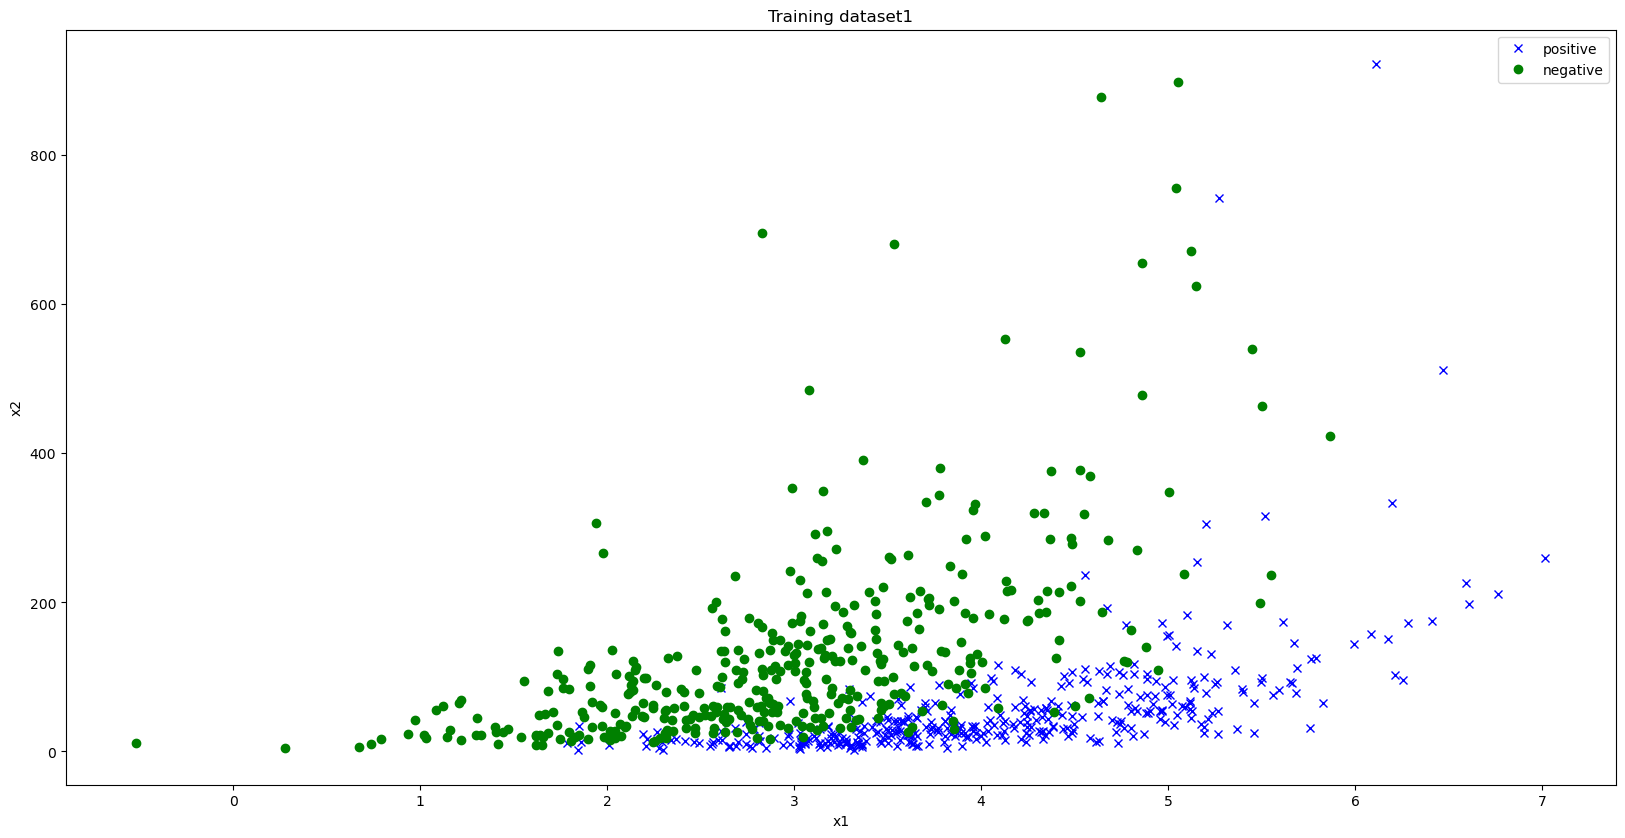

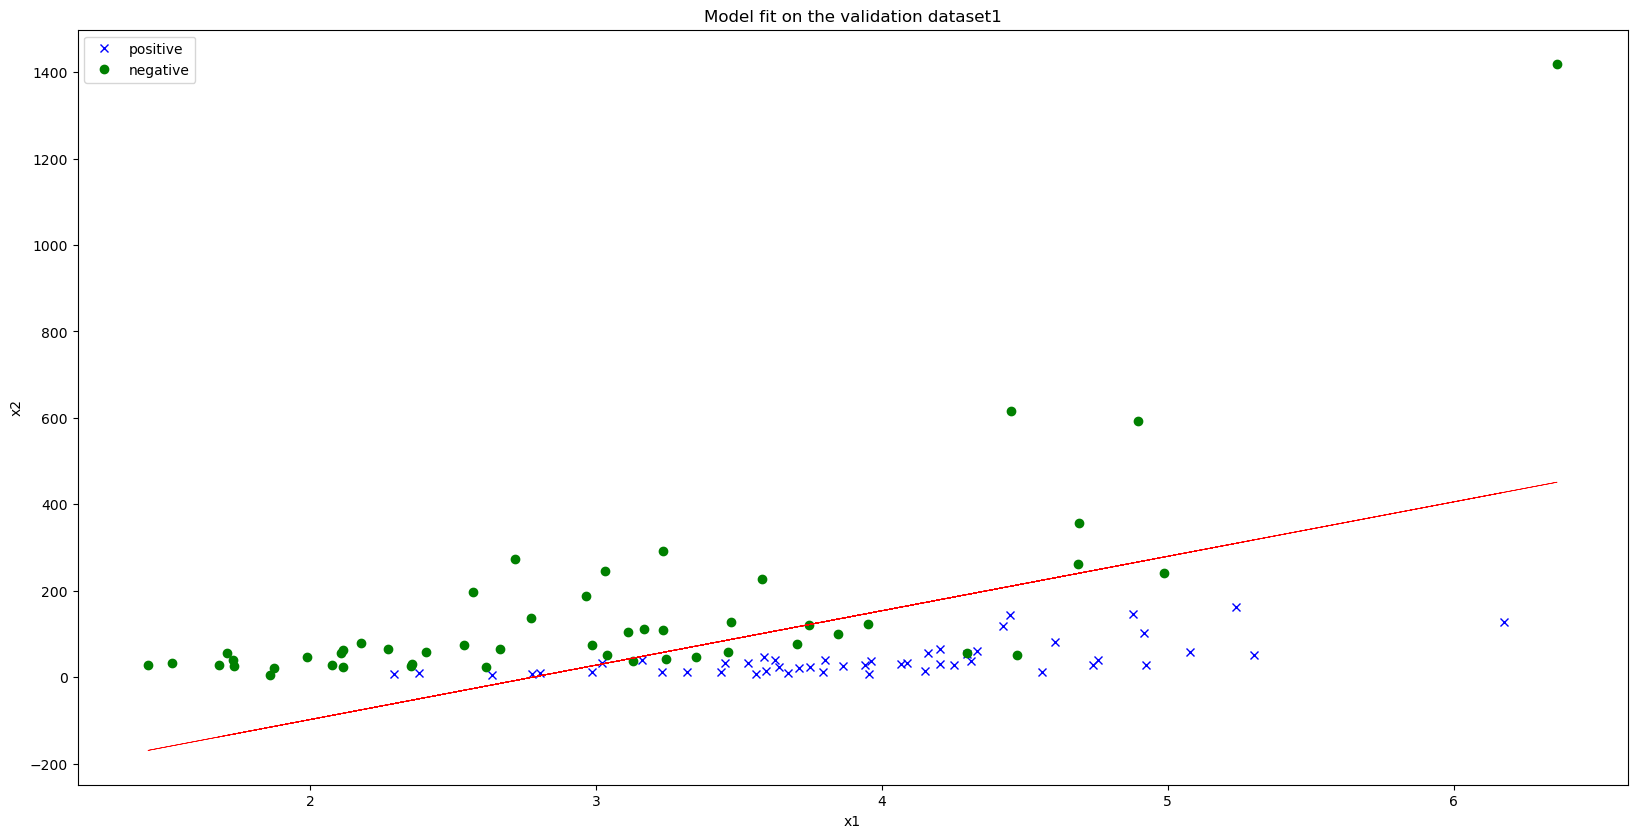

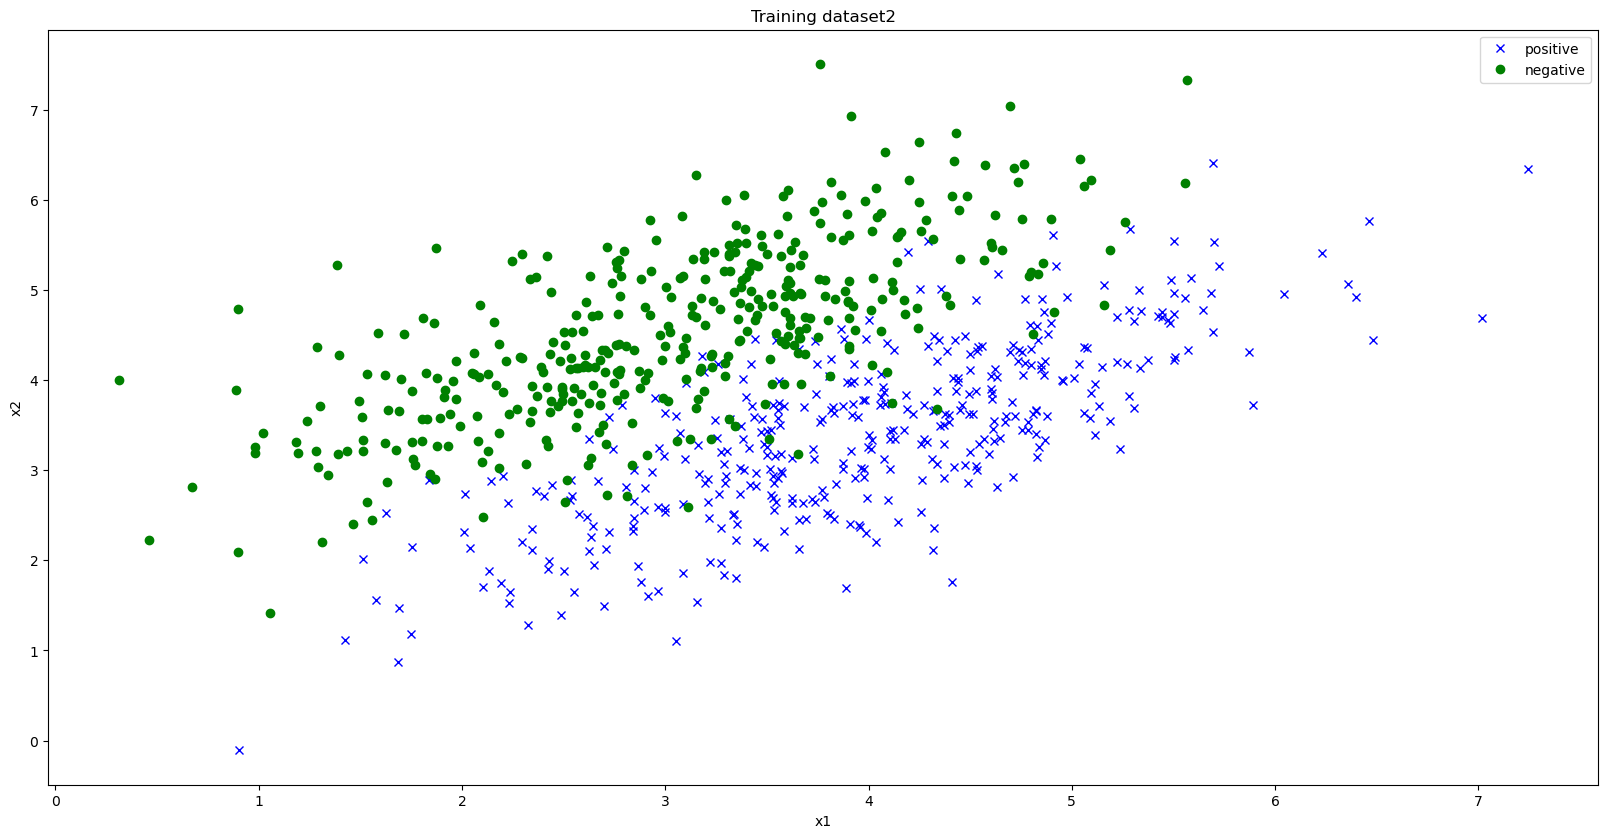

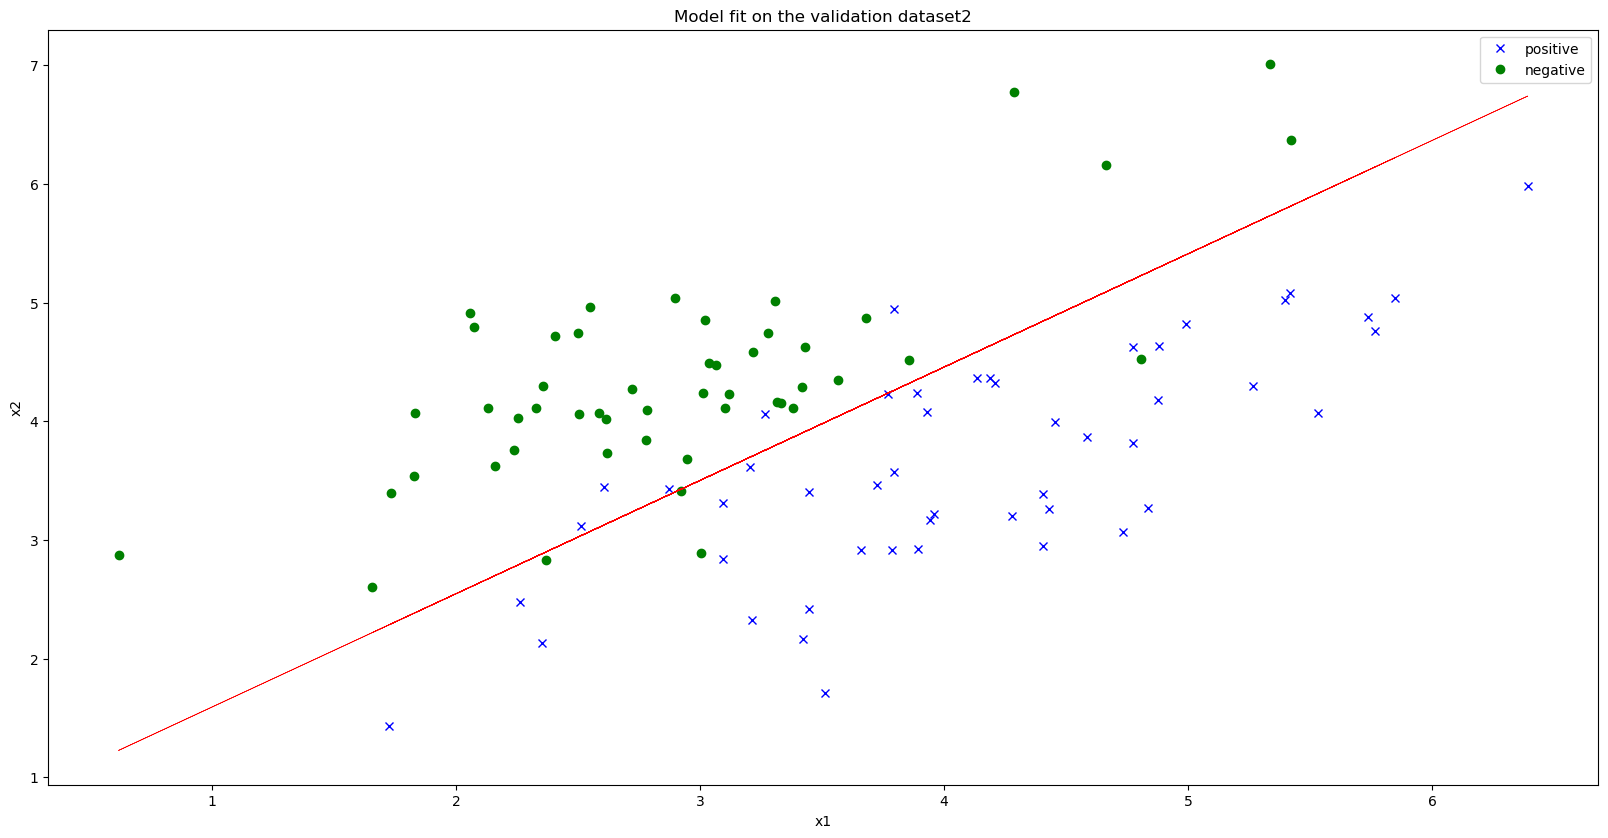

ds1 accuracy:83.0
ds2 accuracy:91.0


In [4]:
def plot_data(x,y,title,theta=None,theta0=None ):
    
    ind=y[y['y']==1].index.tolist()
    ind1=y[y['y']==0].index.tolist()

    xx=x[['x_1']].values
    xx1=x[['x_2']].values

    x_1_mod=xx[ind,:]
    x_1_mod1=xx[ind1,:]

    x_2_mod=xx1[ind,:]
    x_2_mod1=xx1[ind1 ,:]

    ##for deciding to plot the decision boundary with the dataset
    if theta is not None:
        x2=(-1*(theta0/theta[1]))+(-1*((theta[0]/theta[1])*xx))
     
    plt.figure(figsize=(20,10),dpi=100)
    plt.plot(x_1_mod,x_2_mod,'bx',linewidth=1)
    plt.plot(x_1_mod1,x_2_mod1,'go',linewidth=0.5)
    ###deciding to plot the decision boundary with the dataset
    if theta is not None:
        plt.plot(xx,x2,'r',linewidth=0.5)
        
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(['positive','negative'])
    plt.title(title)
    plt.show()
   #f.savefig('prob_1e_data2_pred.png')


if __name__=='__main__':
    acc=main_func(1,train_path='ds1_train.csv',valid_path='ds1_valid.csv')
    acc1=main_func(2,train_path='ds2_train.csv',valid_path='ds2_valid.csv')
print(f'ds1 accuracy:{acc}\nds2 accuracy:{acc1}')